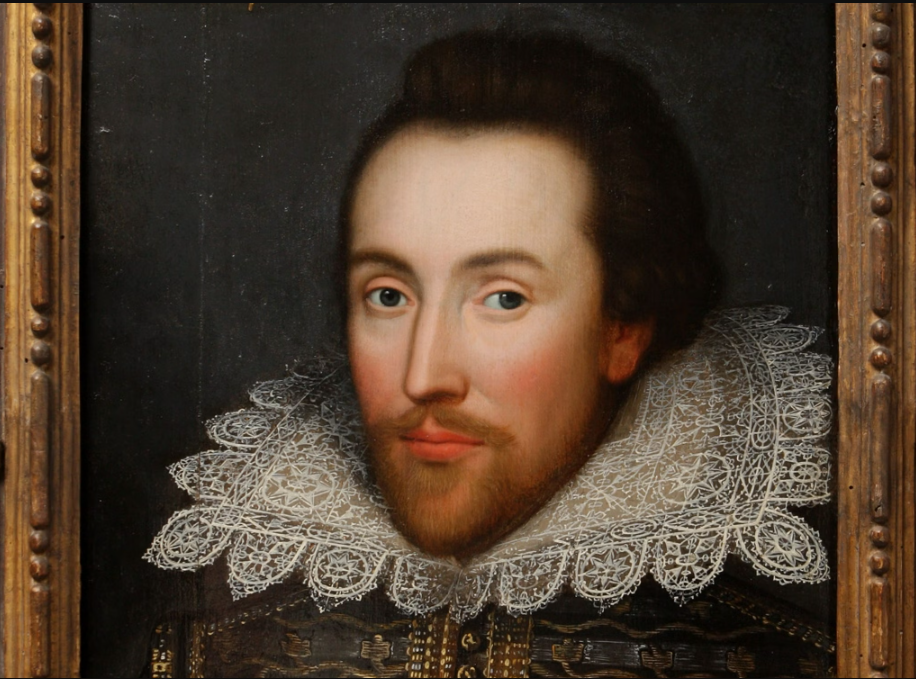

## Brief History about Shakespeare -

William Shakespeare (bapt.Tooltip baptised 26[a] April 1564 – 23 April 1616)[b] was an English playwright, poet and actor. He is widely regarded as the greatest writer in the English language and the world's pre-eminent dramatist.[3][4][5] He is often called England's national poet and the "Bard of Avon" (or simply "the Bard"). His extant works, including collaborations, consist of some 39 plays, 154 sonnets, three long narrative poems, and a few other verses, some of uncertain authorship. His plays have been translated into every major living language and are performed more often than those of any other playwright.[6] Shakespeare remains arguably the most influential writer in the English language, and his works continue to be studied and reinterpreted.

## Project Description -

I've employed a Shakespearean corpus as training data for a model. This model, when provided with an input text, generates an output text of the specified length. Upon examining the generated output, you'll notice that it adheres to the structure found in Shakespeare's writings, employs comparable vocabulary, and echoes similar dialogues. It's important to note that this output text is entirely machine-generated and does not merely excerpt content from the original dataset. The dataset encompasses more than 5 million characters, featuring 84 unique characters.

### 1. Importing dependencies and reading the data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
path_to_file = 'shakespeare.txt'

In [ ]:
text = open(path_to_file,'r').read()

In [ ]:
#print(text[14050:14250])

In [ ]:
vocab = sorted(set(text)) #To get unique characters in text file.

In [ ]:
len(vocab) #Required to provide number of neurons for dense layer

84

### 2. Text processing and Vectorisation

In [ ]:
#Using dictionary comprehension-
char_to_ind = {char:ind for ind,char in enumerate(vocab)}

In [ ]:
char_to_ind

{'\n': 0,
 ' ': 1,
 '!': 2,
 '"': 3,
 '&': 4,
 "'": 5,
 '(': 6,
 ')': 7,
 ',': 8,
 '-': 9,
 '.': 10,
 '0': 11,
 '1': 12,
 '2': 13,
 '3': 14,
 '4': 15,
 '5': 16,
 '6': 17,
 '7': 18,
 '8': 19,
 '9': 20,
 ':': 21,
 ';': 22,
 '<': 23,
 '>': 24,
 '?': 25,
 'A': 26,
 'B': 27,
 'C': 28,
 'D': 29,
 'E': 30,
 'F': 31,
 'G': 32,
 'H': 33,
 'I': 34,
 'J': 35,
 'K': 36,
 'L': 37,
 'M': 38,
 'N': 39,
 'O': 40,
 'P': 41,
 'Q': 42,
 'R': 43,
 'S': 44,
 'T': 45,
 'U': 46,
 'V': 47,
 'W': 48,
 'X': 49,
 'Y': 50,
 'Z': 51,
 '[': 52,
 ']': 53,
 '_': 54,
 '`': 55,
 'a': 56,
 'b': 57,
 'c': 58,
 'd': 59,
 'e': 60,
 'f': 61,
 'g': 62,
 'h': 63,
 'i': 64,
 'j': 65,
 'k': 66,
 'l': 67,
 'm': 68,
 'n': 69,
 'o': 70,
 'p': 71,
 'q': 72,
 'r': 73,
 's': 74,
 't': 75,
 'u': 76,
 'v': 77,
 'w': 78,
 'x': 79,
 'y': 80,
 'z': 81,
 '|': 82,
 '}': 83}

In [ ]:
char_to_ind['H']

33

In [ ]:
ind_to_char = np.array(vocab)

In [ ]:
ind_to_char[33]

'H'

### 3. Convert text corpus to integers based on char_to_ind dictionary created

In [ ]:
encoded_text = np.array([char_to_ind[c] for c in text])

In [ ]:
encoded_text #

array([ 0,  1,  1, ..., 30, 39, 29])

In [ ]:
encoded_text.shape #more than 10 million should be good for GRU model

(5445609,)

In [ ]:
#Actual text from the corpus -
sample_text = text[:500]
sample_text

"\n                     1\n  From fairest creatures we desire increase,\n  That thereby beauty's rose might never die,\n  But as the riper should by time decease,\n  His tender heir might bear his memory:\n  But thou contracted to thine own bright eyes,\n  Feed'st thy light's flame with self-substantial fuel,\n  Making a famine where abundance lies,\n  Thy self thy foe, to thy sweet self too cruel:\n  Thou that art now the world's fresh ornament,\n  And only herald to the gaudy spring,\n  Within thine own bu"

In [ ]:
#Encoded text from the corpus -
encoded_text[:500]

array([ 0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, 12,  0,  1,  1, 31, 73, 70, 68,  1, 61, 56, 64,
       73, 60, 74, 75,  1, 58, 73, 60, 56, 75, 76, 73, 60, 74,  1, 78, 60,
        1, 59, 60, 74, 64, 73, 60,  1, 64, 69, 58, 73, 60, 56, 74, 60,  8,
        0,  1,  1, 45, 63, 56, 75,  1, 75, 63, 60, 73, 60, 57, 80,  1, 57,
       60, 56, 76, 75, 80,  5, 74,  1, 73, 70, 74, 60,  1, 68, 64, 62, 63,
       75,  1, 69, 60, 77, 60, 73,  1, 59, 64, 60,  8,  0,  1,  1, 27, 76,
       75,  1, 56, 74,  1, 75, 63, 60,  1, 73, 64, 71, 60, 73,  1, 74, 63,
       70, 76, 67, 59,  1, 57, 80,  1, 75, 64, 68, 60,  1, 59, 60, 58, 60,
       56, 74, 60,  8,  0,  1,  1, 33, 64, 74,  1, 75, 60, 69, 59, 60, 73,
        1, 63, 60, 64, 73,  1, 68, 64, 62, 63, 75,  1, 57, 60, 56, 73,  1,
       63, 64, 74,  1, 68, 60, 68, 70, 73, 80, 21,  0,  1,  1, 27, 76, 75,
        1, 75, 63, 70, 76,  1, 58, 70, 69, 75, 73, 56, 58, 75, 60, 59,  1,
       75, 70,  1, 75, 63

### 4.Creating Batches

In [ ]:
print(text[:500])


                     1
  From fairest creatures we desire increase,
  That thereby beauty's rose might never die,
  But as the riper should by time decease,
  His tender heir might bear his memory:
  But thou contracted to thine own bright eyes,
  Feed'st thy light's flame with self-substantial fuel,
  Making a famine where abundance lies,
  Thy self thy foe, to thy sweet self too cruel:
  Thou that art now the world's fresh ornament,
  And only herald to the gaudy spring,
  Within thine own bu


In [ ]:
line = 'From fairest creatures we desire increase'
len(line)

41

In [ ]:
lines = '''From fairest creatures we desire increase,
  That thereby beauty's rose might never die,
  But as the riper should by time decease'''
len(lines)

130

#### We can observe that every three lines has some sort of rhyming words ending and are of some structure,
#### hence choosing the structure length to be around '120' characters

In [ ]:
seq_len = 120

In [ ]:
total_num_seq = len(text)//seq_len #Doing floor division to drop the remainder
total_num_seq

45380

In [ ]:
# Create training sequences using dataset object from tensorflow -

char_dataset = tf.data.Dataset.from_tensor_slices(encoded_text)

In [ ]:
char_dataset

<_TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>

In [ ]:
# for item in char_dataset.take(500):
#     print(ind_to_char[item.numpy()])

In [ ]:
sequences = char_dataset.batch(batch_size = seq_len+1,drop_remainder = True) #seq_len+1 is done because of zero indexing

In [ ]:
#Creating custom function to generate two sequences one without last character and one one stepped ahead without first character
def create_seq_targets(seq):
    input_txt = seq[:-1]
    target_txt = seq[1:]
    return input_txt,target_txt

In [ ]:
dataset = sequences.map(create_seq_targets)

In [ ]:
for input_txt,target_txt in dataset.take(1):
    print(input_txt.numpy())
    print(''.join(ind_to_char[input_txt.numpy()]))
    print('\n')
    print(target_txt.numpy())
    print(''.join(ind_to_char[target_txt.numpy()]))

[ 0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 12  0
  1  1 31 73 70 68  1 61 56 64 73 60 74 75  1 58 73 60 56 75 76 73 60 74
  1 78 60  1 59 60 74 64 73 60  1 64 69 58 73 60 56 74 60  8  0  1  1 45
 63 56 75  1 75 63 60 73 60 57 80  1 57 60 56 76 75 80  5 74  1 73 70 74
 60  1 68 64 62 63 75  1 69 60 77 60 73  1 59 64 60  8  0  1  1 27 76 75]

                     1
  From fairest creatures we desire increase,
  That thereby beauty's rose might never die,
  But


[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 12  0  1
  1 31 73 70 68  1 61 56 64 73 60 74 75  1 58 73 60 56 75 76 73 60 74  1
 78 60  1 59 60 74 64 73 60  1 64 69 58 73 60 56 74 60  8  0  1  1 45 63
 56 75  1 75 63 60 73 60 57 80  1 57 60 56 76 75 80  5 74  1 73 70 74 60
  1 68 64 62 63 75  1 69 60 77 60 73  1 59 64 60  8  0  1  1 27 76 75  1]
                     1
  From fairest creatures we desire increase,
  That thereby beauty's rose might never die,
  But 


In [ ]:
batch_size = 128

In [ ]:
buffer_size = 10000 #Specifies how much text to be in memory before shuffle instead of keeping entire corpus in memory

dataset = dataset.shuffle(buffer_size=buffer_size).batch(batch_size,drop_remainder = True)

In [ ]:
dataset #Shapesize 128,120 refers to 128 batches being sent which are 120 characters long.

<_BatchDataset element_spec=(TensorSpec(shape=(128, 120), dtype=tf.int64, name=None), TensorSpec(shape=(128, 120), dtype=tf.int64, name=None))>

### 5. Creating the model

In [ ]:
vocab_size = len(vocab)
vocab_size

84

In [ ]:
embed_dim = 64  #embedding size should be more or less in range of vocab_size, too large embedding size should be prevented

In [ ]:
rnn_neurons = 1026 #we are doing a simple model with just 3 layers

In [ ]:
from tensorflow.keras.losses import sparse_categorical_crossentropy #because our labels are one hot encoded we need to use sparse_categorical_cross entropy

In [ ]:
#help(sparse_categorical_crossentropy)

Help on function sparse_categorical_crossentropy in module keras.src.losses:

sparse_categorical_crossentropy(y_true, y_pred, from_logits=False, axis=-1, ignore_class=None)
    Computes the sparse categorical crossentropy loss.
    
    Standalone usage:
    
    >>> y_true = [1, 2]
    >>> y_pred = [[0.05, 0.95, 0], [0.1, 0.8, 0.1]]
    >>> loss = tf.keras.losses.sparse_categorical_crossentropy(y_true, y_pred)
    >>> assert loss.shape == (2,)
    >>> loss.numpy()
    array([0.0513, 2.303], dtype=float32)
    
    >>> y_true = [[[ 0,  2],
    ...            [-1, -1]],
    ...           [[ 0,  2],
    ...            [-1, -1]]]
    >>> y_pred = [[[[1.0, 0.0, 0.0], [0.0, 0.0, 1.0]],
    ...             [[0.2, 0.5, 0.3], [0.0, 1.0, 0.0]]],
    ...           [[[1.0, 0.0, 0.0], [0.0, 0.5, 0.5]],
    ...            [[0.2, 0.5, 0.3], [0.0, 1.0, 0.0]]]]
    >>> loss = tf.keras.losses.sparse_categorical_crossentropy(
    ...   y_true, y_pred, ignore_class=-1)
    >>> loss.numpy()
    array([[[2

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU,Dense,Embedding

In [ ]:
def sparse_cat(y_true,y_pred): #we define custom function for sparse cat to make from_logits to true as we cannot do that during model compile.
    return sparse_categorical_crossentropy(y_true,y_pred,from_logits=True)

In [ ]:
def create_model(vocab_size,embed_dim,rnn_neurons,batch_size):

    model = Sequential()
    model.add(Embedding(vocab_size,embed_dim,batch_input_shape = [batch_size,None]))
    model.add(GRU(rnn_neurons,return_sequences=True,stateful=True,recurrent_initializer='glorot_uniform'))
    model.add(Dense(vocab_size))

    model.compile('adam',loss = sparse_cat)

    return model

In [ ]:
model = create_model(vocab_size = vocab_size,
                    embed_dim = embed_dim,
                    rnn_neurons = rnn_neurons,
                    batch_size=batch_size)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (128, None, 64)           5376      
                                                                 
 gru (GRU)                   (128, None, 1026)         3361176   
                                                                 
 dense (Dense)               (128, None, 84)           86268     
                                                                 
Total params: 3452820 (13.17 MB)
Trainable params: 3452820 (13.17 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 6. Training the model

Testing for just 1 batch

In [ ]:
for input_example_batch,target_example_batch in dataset.take(1):
  example_batch_predictions = model(input_example_batch)

In [ ]:
example_batch_predictions.shape #batchsize,sequencelength,vocabsize

TensorShape([128, 120, 84])

In [ ]:
example_batch_predictions[0] #these are probabilities

<tf.Tensor: shape=(120, 84), dtype=float32, numpy=
array([[-0.00565242,  0.00152065, -0.00142895, ...,  0.00357203,
         0.00402411,  0.00160596],
       [-0.0041998 ,  0.0005794 ,  0.00022277, ...,  0.00756446,
         0.00266354,  0.00137482],
       [ 0.00395977, -0.00246272,  0.00318724, ..., -0.00188142,
         0.00740452,  0.00163148],
       ...,
       [-0.0022307 ,  0.0048279 ,  0.0044763 , ..., -0.00579171,
         0.00800936, -0.00461536],
       [-0.00636695,  0.003082  ,  0.0004842 , ..., -0.00096868,
         0.00813224, -0.00044254],
       [ 0.00034116, -0.00231908, -0.00139042, ..., -0.00313305,
         0.00362412, -0.00352688]], dtype=float32)>

In [ ]:
sampled_indices = tf.random.categorical(example_batch_predictions[0],num_samples = 1)

In [ ]:
sampled_indices = tf.squeeze(sampled_indices,axis = -1).numpy()

In [ ]:
sampled_indices

array([50,  7, 78, 13, 46, 17, 15, 20, 52, 23, 28, 52,  6,  2, 78, 22,  6,
       58, 21, 11, 58, 21, 13, 51,  7, 44, 26, 66, 25, 70, 35, 21, 10, 10,
        8, 35, 13, 29,  0, 23, 67, 71, 34, 54, 41,  8, 81, 16, 19, 51, 12,
       72, 83, 63, 77, 18, 79, 69, 53, 69, 54,  9, 77, 64, 30, 32, 54, 28,
        7, 83, 12, 54,  5, 57, 66, 22, 79, 48, 31, 42, 31, 14, 69, 19, 81,
       32, 45, 16, 82, 40, 48,  2, 51, 81, 19, 57, 23, 73, 35, 70, 40, 26,
       72,  7, 14, 54, 81, 29, 59, 15, 25, 71, 65, 12, 38, 42, 64, 77, 42,
       39])

In [ ]:
ind_to_char[sampled_indices]

array(['Y', ')', 'w', '2', 'U', '6', '4', '9', '[', '<', 'C', '[', '(',
       '!', 'w', ';', '(', 'c', ':', '0', 'c', ':', '2', 'Z', ')', 'S',
       'A', 'k', '?', 'o', 'J', ':', '.', '.', ',', 'J', '2', 'D', '\n',
       '<', 'l', 'p', 'I', '_', 'P', ',', 'z', '5', '8', 'Z', '1', 'q',
       '}', 'h', 'v', '7', 'x', 'n', ']', 'n', '_', '-', 'v', 'i', 'E',
       'G', '_', 'C', ')', '}', '1', '_', "'", 'b', 'k', ';', 'x', 'W',
       'F', 'Q', 'F', '3', 'n', '8', 'z', 'G', 'T', '5', '|', 'O', 'W',
       '!', 'Z', 'z', '8', 'b', '<', 'r', 'J', 'o', 'O', 'A', 'q', ')',
       '3', '_', 'z', 'D', 'd', '4', '?', 'p', 'j', '1', 'M', 'Q', 'i',
       'v', 'Q', 'N'], dtype='<U1')

In [ ]:
#NOTE : Takes about 1hr per epoch on google colab
epochs = 30
model.fit(dataset,epochs = epochs)

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
#using pretrained model

model = create_model(vocab_size, embed_dim, rnn_neurons, batch_size=1)

model.load_weights('shakespeare_gen.h5')


In [ ]:
model.build(tf.TensorShape([1, None]))

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (1, None, 64)             5376      
                                                                 
 gru_8 (GRU)                 (1, None, 1026)           3361176   
                                                                 
 dense_8 (Dense)             (1, None, 84)             86268     
                                                                 
Total params: 3452820 (13.17 MB)
Trainable params: 3452820 (13.17 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
def generate_text(model, start_seed,gen_size=100,temp=1.0):
  '''
  model: Trained Model to Generate Text
  start_seed: Intial Seed text in string form
  gen_size: Number of characters to generate

  Basic idea behind this function is to take in some seed text, format it so
  that it is in the correct shape for our network, then loop the sequence as
  we keep adding our own predicted characters. Similar to our work in the RNN
  time series problems.
  '''

  # Number of characters to generate
  num_generate = gen_size

  # Vecotrizing starting seed text
  input_eval = [char_to_ind[s] for s in start_seed]

  # Expand to match batch format shape
  input_eval = tf.expand_dims(input_eval, 0)

  # Empty list to hold resulting generated text
  text_generated = []

  # Temperature effects randomness in our resulting text
  # The term is derived from entropy/thermodynamics.
  # The temperature is used to effect probability of next characters.
  # Higher probability == lesss surprising/ more expected
  # Lower temperature == more surprising / less expected

  temperature = temp

  # Here batch size == 1
  model.reset_states()

  for i in range(num_generate):

      # Generate Predictions
      predictions = model(input_eval)

      # Remove the batch shape dimension
      predictions = tf.squeeze(predictions, 0)

      # Use a cateogircal disitribution to select the next character
      predictions = predictions / temperature
      predicted_id = tf.random.categorical(predictions, num_samples=1)[-1,0].numpy()

      # Pass the predicted charracter for the next input
      input_eval = tf.expand_dims([predicted_id], 0)

      # Transform back to character letter
      text_generated.append(ind_to_char[predicted_id])

  return (start_seed + ''.join(text_generated))

### 7.Generated Output for seed_word = 'JULIET' of size 1000

In [ ]:
print(generate_text(model,"JULIET",gen_size=1000))

JULIETHET. And what would you your leisure stol'n in evil?
    Have hate an enemy to an hour.
  
     Think not the while of her his battle.
 Exit
  HIPPOLYTA. What is your meteor for?
  MALVOLIO. Here is most doubt not but that is mine. If it please myself
    May halt by that. Patience here, love takes, love;  
    But I this dignity of mine
    Where thus is shirtiously by earth kept creature,
    As he I would not? and his friend's I too,
    I must conscience-an old manly deed,
    Because it is as e bonds to your youth and how
    many motive off who?                                  Re-enter Macbeth.

              Enter the Emperor CLEOMENES

  QUINCE. If the letter is at the spectators, that
    will some of this cheek place whereby they know well of her. It
    was my fool. How now, sol! I am afraid of a furious and look'st
    out my purse woman! I have seen them to me.
                                                [LUCIO with a wife

Enter FLUELLEN and DIOMEDES, MENENIUS,

## *Thank you!!*